# 1_EDA(2) : n-gram  
references :   
https://skyjwoo.tistory.com/entry/%EC%9E%90%EC%97%B0%EC%96%B4-%EC%B2%98%EB%A6%AC-EDAExploratory-Data-Analysis  
https://jiho-ml.com/weekly-nlp-14/  
https://heytech.tistory.com/343

n-gram : n개이 연속적인 단어 나열, 보통 1-gram(unigram), 2-gram(bigram), 3-gram(trigram), n은 최대 5를 넘지 않는 선에서 활용 권장  
ex) n=3 이면 P(w3 | w1, w2) 계산  
한계점 : 정확도 다른 언어 모델에 비해 낮음, 희소 문제(연속으로 가지는 문장 자체 드물다), n이 작아도 (성능 안좋음) 커도 (희소) 문제

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import sklearn as sk
import collections
import matplotlib.font_manager as fm

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
news_df = pd.read_csv("C:/Users/kimch/Desktop/NLP_news_topic_classification/train_data.csv")
topic = pd.read_csv("C:/Users/kimch/Desktop/NLP_news_topic_classification/topic_dict.csv")

In [4]:
itsci = news_df[news_df["topic_idx"]==0]
econ = news_df[news_df["topic_idx"]==1]
society = news_df[news_df["topic_idx"]==2]
lifestyle = news_df[news_df["topic_idx"]==3]
world = news_df[news_df["topic_idx"]==4]
sports = news_df[news_df["topic_idx"]==5]
politic = news_df[news_df["topic_idx"]==6]

In [5]:
from eunjeon import Mecab
m = Mecab()

In [10]:
m.pos("품사를 태깅 합니다")

[('품사', 'NNG'), ('를', 'JKO'), ('태', 'VV'), ('깅', 'UNKNOWN'), ('합니다', 'VV+EC')]

In [11]:
m.morphs("형태소 분리를 지원합니다")

['형태소', '분리', '를', '지원', '합니다']

In [12]:
m.nouns("명사에 해당하는 형태소만 추출합니다")

['명사', '해당', '형태소', '추출']

## n-gram 추출

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]

## 2-gram

### IT/과학

In [8]:
itsci_corpus = []
for t in itsci["title"].to_list():
    itsci_corpus.append(' '.join(m.morphs(t)))

[Text(0.5, 0, '빈도 수'), Text(0, 0.5, '2gram')]

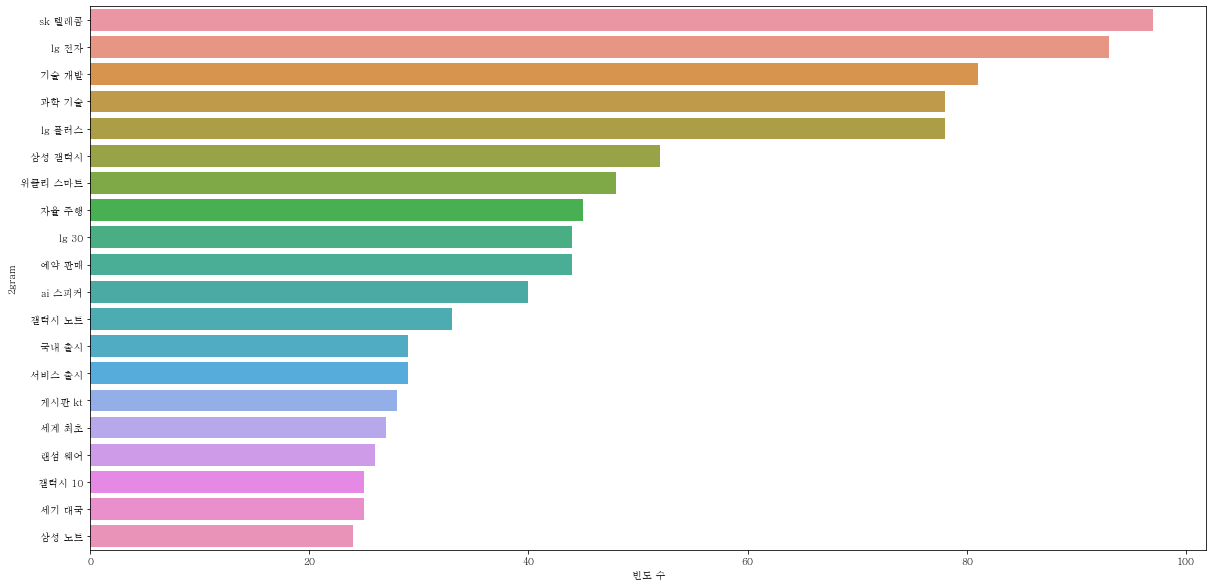

In [29]:
itsci_top_bigram = get_top_ngram(itsci_corpus, 2)[:20]
x, y = map(list, zip(*itsci_top_bigram))

plt.rcParams['font.family'] = 'batang'
plt.figure(figsize=(20,10))
ax = sns.barplot(x=y, y=x)
ax.set(xlabel="빈도 수", ylabel="2gram")

In [30]:
itsci_top_bigram

[('sk 텔레콤', 97),
 ('lg 전자', 93),
 ('기술 개발', 81),
 ('과학 기술', 78),
 ('lg 플러스', 78),
 ('삼성 갤럭시', 52),
 ('위클리 스마트', 48),
 ('자율 주행', 45),
 ('lg 30', 44),
 ('예약 판매', 44),
 ('ai 스피커', 40),
 ('갤럭시 노트', 33),
 ('국내 출시', 29),
 ('서비스 출시', 29),
 ('게시판 kt', 28),
 ('세계 최초', 27),
 ('랜섬 웨어', 26),
 ('갤럭시 10', 25),
 ('세기 대국', 25),
 ('삼성 노트', 24)]

### 경제

In [31]:
econ_corpus = []
for t in econ["title"].to_list():
    econ_corpus.append(' '.join(m.morphs(t)))

[Text(0.5, 0, '빈도 수'), Text(0, 0.5, '2gram')]

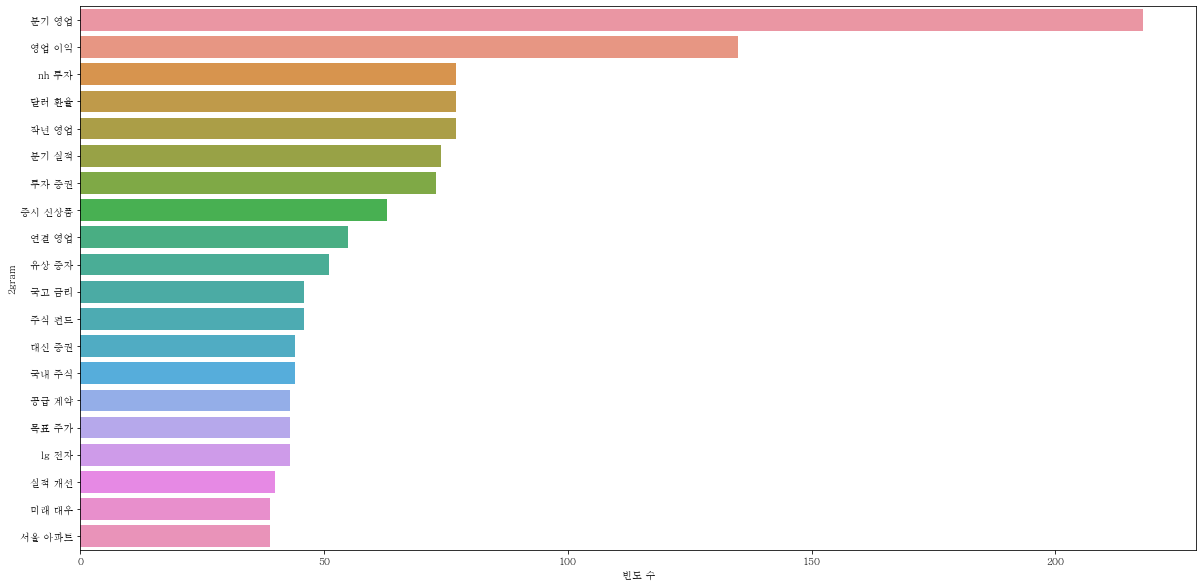

In [33]:
econ_top_bigram = get_top_ngram(econ_corpus, 2)[:20]
x, y = map(list, zip(*econ_top_bigram))

plt.rcParams['font.family'] = 'batang'
plt.figure(figsize=(20,10))
ax = sns.barplot(x=y, y=x)
ax.set(xlabel="빈도 수", ylabel="2gram")

In [34]:
econ_top_bigram

[('분기 영업', 218),
 ('영업 이익', 135),
 ('nh 투자', 77),
 ('달러 환율', 77),
 ('작년 영업', 77),
 ('분기 실적', 74),
 ('투자 증권', 73),
 ('증시 신상품', 63),
 ('연결 영업', 55),
 ('유상 증자', 51),
 ('국고 금리', 46),
 ('주식 펀드', 46),
 ('대신 증권', 44),
 ('국내 주식', 44),
 ('공급 계약', 43),
 ('목표 주가', 43),
 ('lg 전자', 43),
 ('실적 개선', 40),
 ('미래 대우', 39),
 ('서울 아파트', 39)]

### 사회

In [35]:
society_corpus = []
for t in society["title"].to_list():
    society_corpus.append(" ".join(m.morphs(t)))

[Text(0.5, 0, '빈도 수'), Text(0, 0.5, '2gram')]

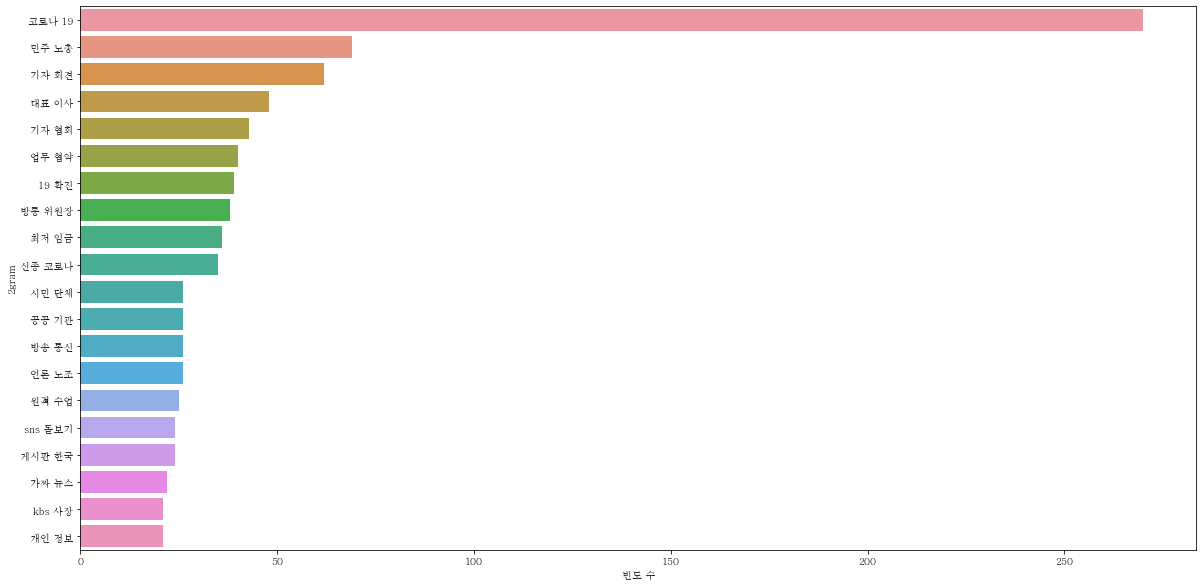

In [37]:
society_top_bigram = get_top_ngram(society_corpus, 2)[:20]
x, y = map(list, zip(*society_top_bigram))

plt.rcParams['font.family'] = 'batang'
plt.figure(figsize=(20,10))
ax = sns.barplot(x=y, y=x)
ax.set(xlabel="빈도 수", ylabel="2gram")

In [38]:
society_top_bigram

[('코로나 19', 270),
 ('민주 노총', 69),
 ('기자 회견', 62),
 ('대표 이사', 48),
 ('기자 협회', 43),
 ('업무 협약', 40),
 ('19 확진', 39),
 ('방통 위원장', 38),
 ('최저 임금', 36),
 ('신종 코로나', 35),
 ('시민 단체', 26),
 ('공공 기관', 26),
 ('방송 통신', 26),
 ('언론 노조', 26),
 ('원격 수업', 25),
 ('sns 돋보기', 24),
 ('게시판 한국', 24),
 ('가짜 뉴스', 22),
 ('kbs 사장', 21),
 ('개인 정보', 21)]

### 생활문화

In [39]:
lifestyle_corpus = []
for t in lifestyle["title"].to_list():
    lifestyle_corpus.append(' '.join(m.morphs(t)))

[Text(0.5, 0, '빈도 수'), Text(0, 0.5, '2gram')]

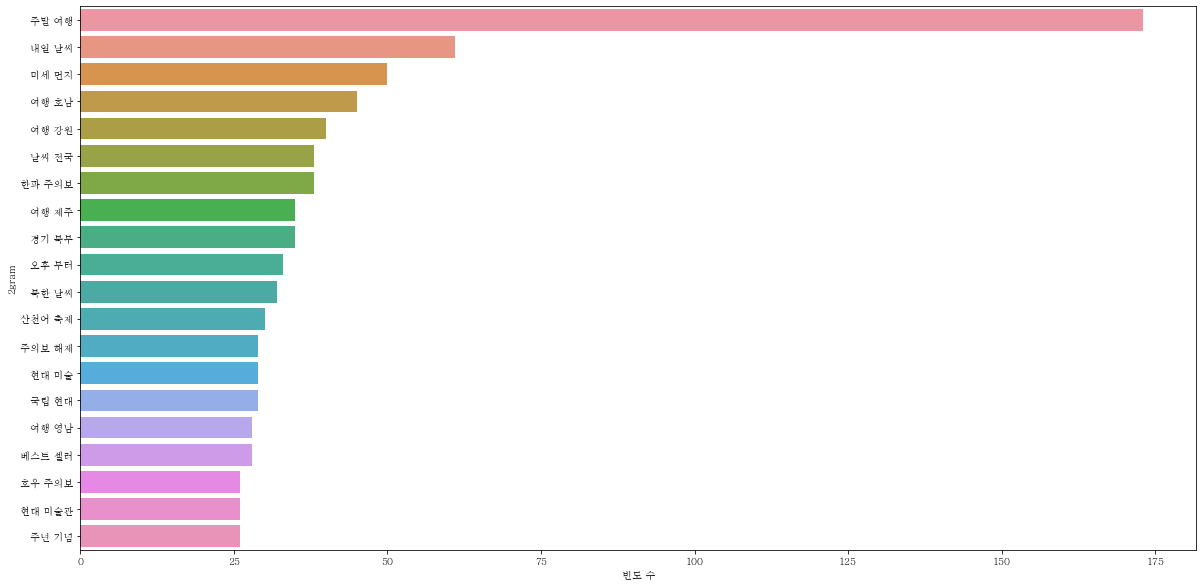

In [41]:
lifestyle_top_bigram = get_top_ngram(lifestyle_corpus, 2)[:20]
x, y = map(list, zip(*lifestyle_top_bigram))

plt.rcParams['font.family'] = 'batang'
plt.figure(figsize=(20,10))
ax = sns.barplot(x=y, y=x)
ax.set(xlabel="빈도 수", ylabel="2gram")

In [42]:
lifestyle_top_bigram

[('주말 여행', 173),
 ('내일 날씨', 61),
 ('미세 먼지', 50),
 ('여행 호남', 45),
 ('여행 강원', 40),
 ('날씨 전국', 38),
 ('한파 주의보', 38),
 ('여행 제주', 35),
 ('경기 북부', 35),
 ('오후 부터', 33),
 ('북한 날씨', 32),
 ('산천어 축제', 30),
 ('주의보 해제', 29),
 ('현대 미술', 29),
 ('국립 현대', 29),
 ('여행 영남', 28),
 ('베스트 셀러', 28),
 ('호우 주의보', 26),
 ('현대 미술관', 26),
 ('주년 기념', 26)]

### 세계

In [44]:
world_corpus = []
for t in world["title"].to_list():
    world_corpus.append(' '.join(m.morphs(t)))

[Text(0.5, 0, '빈도 수'), Text(0, 0.5, '2gram')]

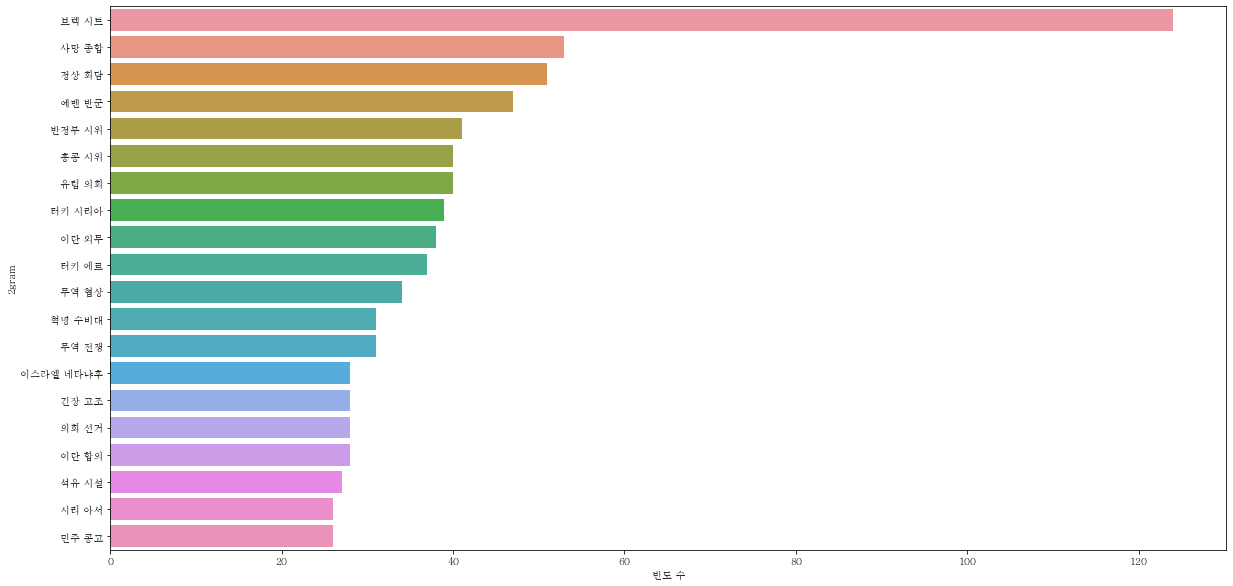

In [46]:
world_top_bigram = get_top_ngram(world_corpus, 2)[:20]
x, y = map(list, zip(*world_top_bigram))

plt.rcParams['font.family'] = 'batang'
plt.figure(figsize=(20,10))
ax = sns.barplot(x=y, y=x)
ax.set(xlabel="빈도 수", ylabel="2gram")

In [47]:
world_top_bigram

[('브렉 시트', 124),
 ('사망 종합', 53),
 ('정상 회담', 51),
 ('예멘 반군', 47),
 ('반정부 시위', 41),
 ('홍콩 시위', 40),
 ('유럽 의회', 40),
 ('터키 시리아', 39),
 ('이란 외무', 38),
 ('터키 에르', 37),
 ('무역 협상', 34),
 ('혁명 수비대', 31),
 ('무역 전쟁', 31),
 ('이스라엘 네타냐후', 28),
 ('긴장 고조', 28),
 ('의회 선거', 28),
 ('이란 합의', 28),
 ('석유 시설', 27),
 ('시리 아서', 26),
 ('민주 콩고', 26)]

### 스포츠

In [48]:
sports_corpus = []
for t in sports["title"].to_list():
    sports_corpus.append(' '.join(m.morphs(t)))

[Text(0.5, 0, '빈도 수'), Text(0, 0.5, '2gram')]

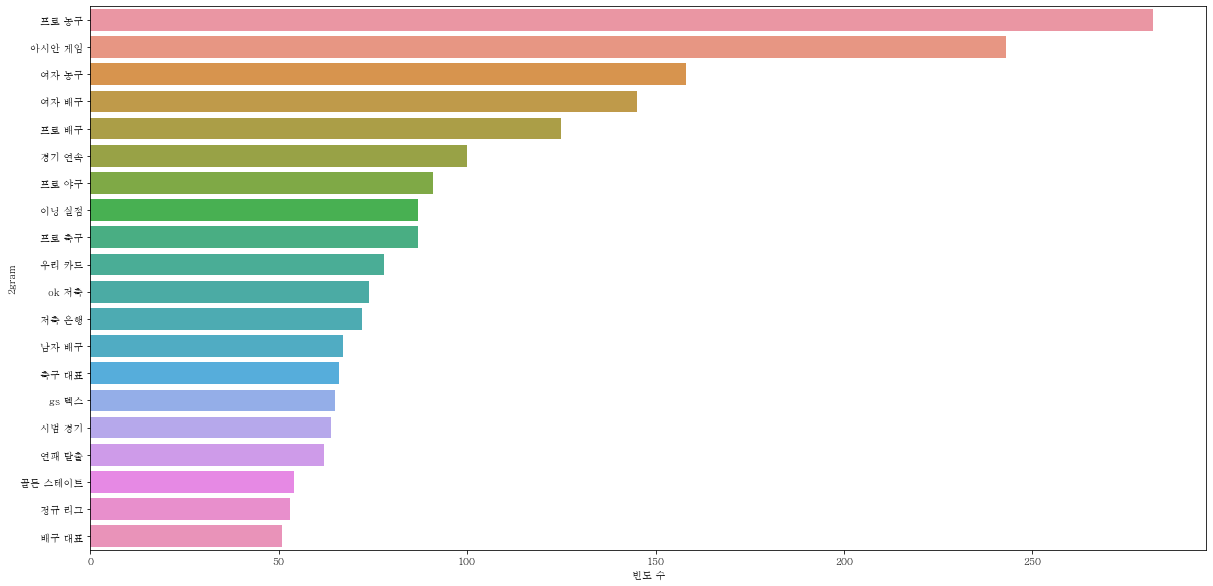

In [50]:
sports_top_bigram = get_top_ngram(sports_corpus, 2)[:20]
x, y = map(list, zip(*sports_top_bigram))

plt.rcParams['font.family'] = 'batang'
plt.figure(figsize=(20,10))
ax = sns.barplot(x=y, y=x)
ax.set(xlabel="빈도 수", ylabel="2gram")

In [51]:
sports_top_bigram

[('프로 농구', 282),
 ('아시안 게임', 243),
 ('여자 농구', 158),
 ('여자 배구', 145),
 ('프로 배구', 125),
 ('경기 연속', 100),
 ('프로 야구', 91),
 ('이닝 실점', 87),
 ('프로 축구', 87),
 ('우리 카드', 78),
 ('ok 저축', 74),
 ('저축 은행', 72),
 ('남자 배구', 67),
 ('축구 대표', 66),
 ('gs 텍스', 65),
 ('시범 경기', 64),
 ('연패 탈출', 62),
 ('골든 스테이트', 54),
 ('정규 리그', 53),
 ('배구 대표', 51)]

### 정치

In [52]:
politic_corpus = []
for t in politic["title"].to_list():
    politic_corpus.append(' '.join(m.morphs(t)))

[Text(0.5, 0, '빈도 수'), Text(0, 0.5, '2gram')]

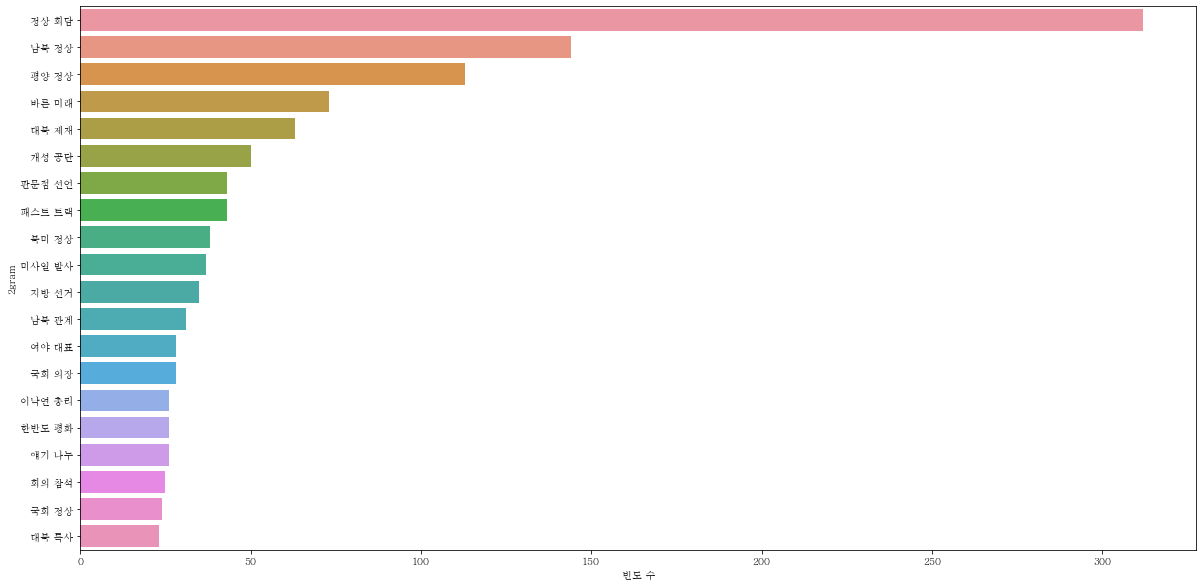

In [53]:
politic_top_bigram = get_top_ngram(politic_corpus, 2)[:20]
x, y = map(list, zip(*politic_top_bigram))

plt.rcParams['font.family'] = 'batang'
plt.figure(figsize=(20,10))
ax = sns.barplot(x=y, y=x)
ax.set(xlabel="빈도 수", ylabel="2gram")

In [54]:
politic_top_bigram

[('정상 회담', 312),
 ('남북 정상', 144),
 ('평양 정상', 113),
 ('바른 미래', 73),
 ('대북 제재', 63),
 ('개성 공단', 50),
 ('판문점 선언', 43),
 ('패스트 트랙', 43),
 ('북미 정상', 38),
 ('미사일 발사', 37),
 ('지방 선거', 35),
 ('남북 관계', 31),
 ('여야 대표', 28),
 ('국회 의장', 28),
 ('이낙연 총리', 26),
 ('한반도 평화', 26),
 ('얘기 나누', 26),
 ('회의 참석', 25),
 ('국회 정상', 24),
 ('대북 특사', 23)]

## 3-gram

### IT/과학

[Text(0.5, 0, '빈도 수'), Text(0, 0.5, '2gram')]

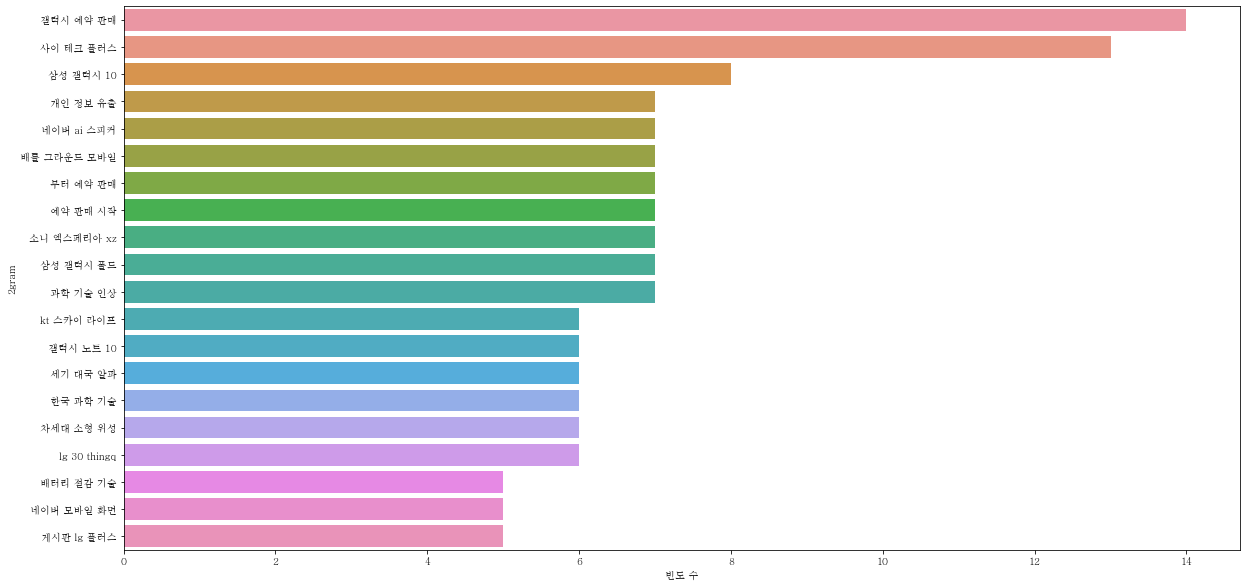

In [56]:
itsci_top_trigram = get_top_ngram(itsci_corpus,3)[:20]
x, y = map(list, zip(*itsci_top_trigram))

plt.rcParams['font.family'] = 'batang'
plt.figure(figsize=(20,10))
ax = sns.barplot(x=y, y=x)
ax.set(xlabel="빈도 수", ylabel="2gram")

In [57]:
itsci_top_trigram

[('갤럭시 예약 판매', 14),
 ('사이 테크 플러스', 13),
 ('삼성 갤럭시 10', 8),
 ('개인 정보 유출', 7),
 ('네이버 ai 스피커', 7),
 ('배틀 그라운드 모바일', 7),
 ('부터 예약 판매', 7),
 ('예약 판매 시작', 7),
 ('소니 엑스페리아 xz', 7),
 ('삼성 갤럭시 폴드', 7),
 ('과학 기술 인상', 7),
 ('kt 스카이 라이프', 6),
 ('갤럭시 노트 10', 6),
 ('세기 대국 알파', 6),
 ('한국 과학 기술', 6),
 ('차세대 소형 위성', 6),
 ('lg 30 thingq', 6),
 ('배터리 절감 기술', 5),
 ('네이버 모바일 화면', 5),
 ('게시판 lg 플러스', 5)]

### 경제

[Text(0.5, 0, '빈도 수'), Text(0, 0.5, '2gram')]

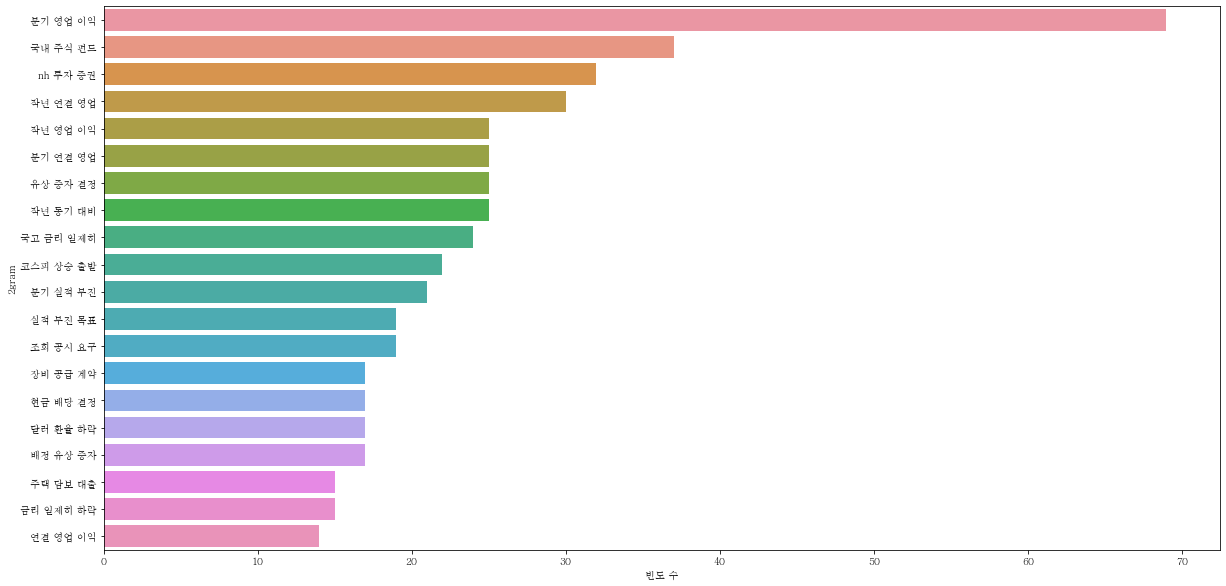

In [58]:
econ_top_trigram = get_top_ngram(econ_corpus, 3)[:20]
x, y = map(list, zip(*econ_top_trigram))

plt.rcParams['font.family'] = 'batang'
plt.figure(figsize=(20,10))
ax = sns.barplot(x=y, y=x)
ax.set(xlabel="빈도 수", ylabel="2gram")

In [59]:
econ_top_trigram

[('분기 영업 이익', 69),
 ('국내 주식 펀드', 37),
 ('nh 투자 증권', 32),
 ('작년 연결 영업', 30),
 ('작년 영업 이익', 25),
 ('분기 연결 영업', 25),
 ('유상 증자 결정', 25),
 ('작년 동기 대비', 25),
 ('국고 금리 일제히', 24),
 ('코스피 상승 출발', 22),
 ('분기 실적 부진', 21),
 ('실적 부진 목표', 19),
 ('조회 공시 요구', 19),
 ('장비 공급 계약', 17),
 ('현금 배당 결정', 17),
 ('달러 환율 하락', 17),
 ('배정 유상 증자', 17),
 ('주택 담보 대출', 15),
 ('금리 일제히 하락', 15),
 ('연결 영업 이익', 14)]

### 사회

[Text(0.5, 0, '빈도 수'), Text(0, 0.5, '2gram')]

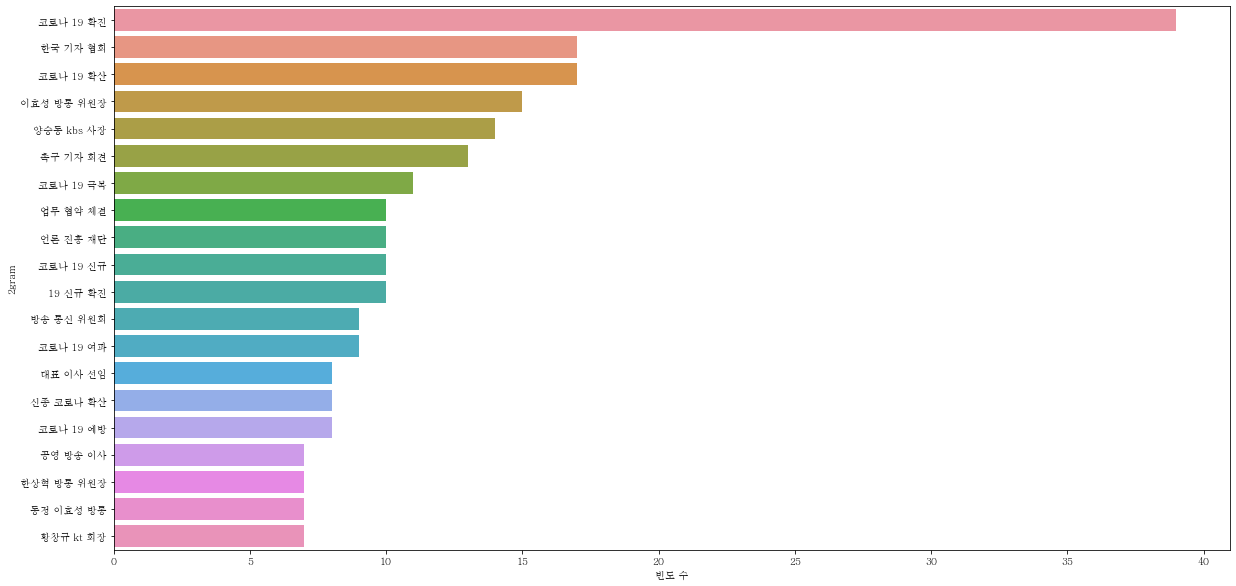

In [60]:
society_top_trigram = get_top_ngram(society_corpus, 3)[:20]
x, y = map(list, zip(*society_top_trigram))

plt.rcParams['font.family'] = 'batang'
plt.figure(figsize=(20,10))
ax = sns.barplot(x=y, y=x)
ax.set(xlabel="빈도 수", ylabel="2gram")

In [61]:
society_top_trigram

[('코로나 19 확진', 39),
 ('한국 기자 협회', 17),
 ('코로나 19 확산', 17),
 ('이효성 방통 위원장', 15),
 ('양승동 kbs 사장', 14),
 ('촉구 기자 회견', 13),
 ('코로나 19 극복', 11),
 ('업무 협약 체결', 10),
 ('언론 진흥 재단', 10),
 ('코로나 19 신규', 10),
 ('19 신규 확진', 10),
 ('방송 통신 위원회', 9),
 ('코로나 19 여파', 9),
 ('대표 이사 선임', 8),
 ('신종 코로나 확산', 8),
 ('코로나 19 예방', 8),
 ('공영 방송 이사', 7),
 ('한상혁 방통 위원장', 7),
 ('동정 이효성 방통', 7),
 ('황창규 kt 회장', 7)]

### 생활문화

[Text(0.5, 0, '빈도 수'), Text(0, 0.5, '2gram')]

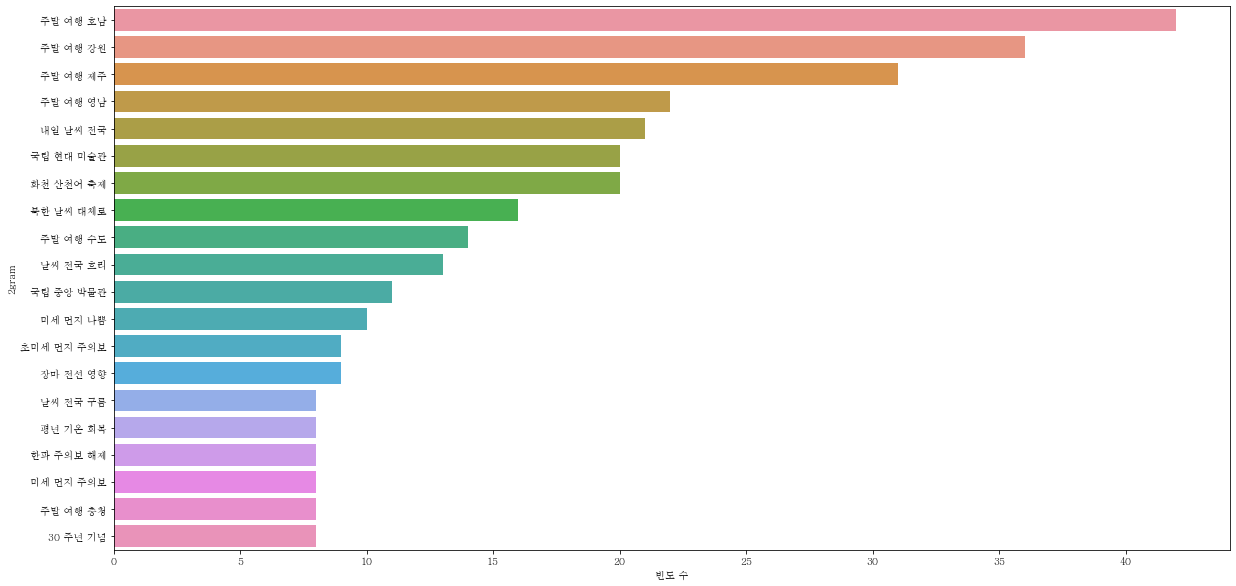

In [62]:
lifestyle_top_trigram = get_top_ngram(lifestyle_corpus, 3)[:20]
x, y = map(list, zip(*lifestyle_top_trigram))

plt.rcParams['font.family'] = 'batang'
plt.figure(figsize=(20,10))
ax = sns.barplot(x=y, y=x)
ax.set(xlabel="빈도 수", ylabel="2gram")

In [63]:
lifestyle_top_trigram

[('주말 여행 호남', 42),
 ('주말 여행 강원', 36),
 ('주말 여행 제주', 31),
 ('주말 여행 영남', 22),
 ('내일 날씨 전국', 21),
 ('국립 현대 미술관', 20),
 ('화천 산천어 축제', 20),
 ('북한 날씨 대체로', 16),
 ('주말 여행 수도', 14),
 ('날씨 전국 흐리', 13),
 ('국립 중앙 박물관', 11),
 ('미세 먼지 나쁨', 10),
 ('초미세 먼지 주의보', 9),
 ('장마 전선 영향', 9),
 ('날씨 전국 구름', 8),
 ('평년 기온 회복', 8),
 ('한파 주의보 해제', 8),
 ('미세 먼지 주의보', 8),
 ('주말 여행 충청', 8),
 ('30 주년 기념', 8)]

### 세계

[Text(0.5, 0, '빈도 수'), Text(0, 0.5, '2gram')]

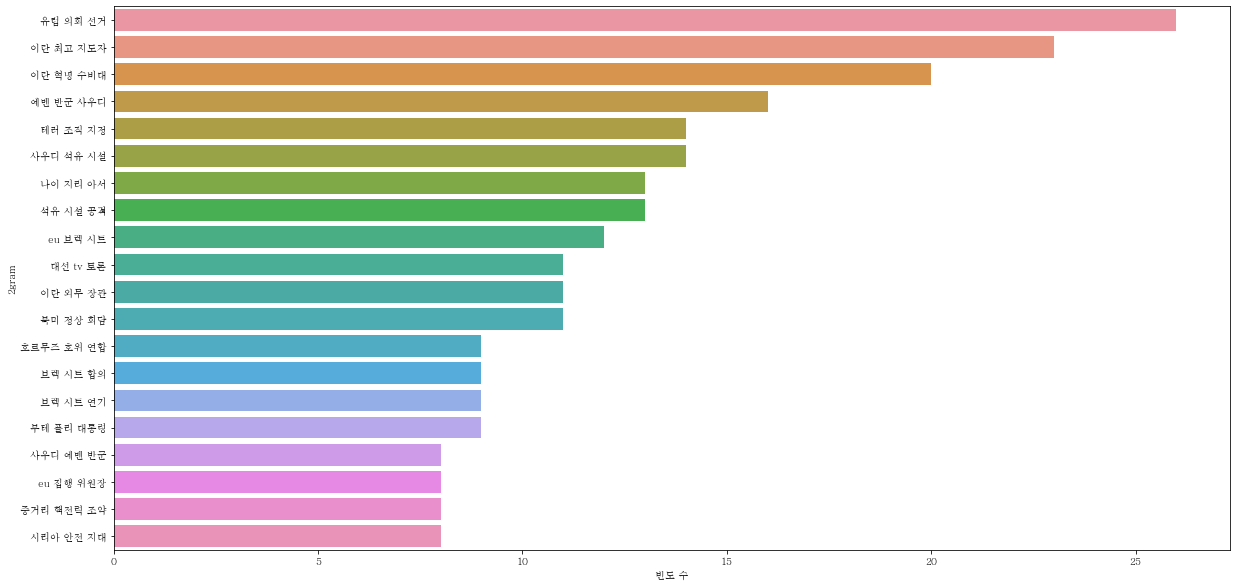

In [64]:
world_top_trigram = get_top_ngram(world_corpus, 3)[:20]
x, y = map(list, zip(*world_top_trigram))

plt.rcParams['font.family'] = 'batang'
plt.figure(figsize=(20,10))
ax = sns.barplot(x=y, y=x)
ax.set(xlabel="빈도 수", ylabel="2gram")

In [65]:
# '나이지리아서' 가 명사 통계나 2-gram에서 잘못 분석 된듯
world_top_trigram

[('유럽 의회 선거', 26),
 ('이란 최고 지도자', 23),
 ('이란 혁명 수비대', 20),
 ('예멘 반군 사우디', 16),
 ('테러 조직 지정', 14),
 ('사우디 석유 시설', 14),
 ('나이 지리 아서', 13),
 ('석유 시설 공격', 13),
 ('eu 브렉 시트', 12),
 ('대선 tv 토론', 11),
 ('이란 외무 장관', 11),
 ('북미 정상 회담', 11),
 ('호르무즈 호위 연합', 9),
 ('브렉 시트 합의', 9),
 ('브렉 시트 연기', 9),
 ('부테 플리 대통령', 9),
 ('사우디 예멘 반군', 8),
 ('eu 집행 위원장', 8),
 ('중거리 핵전력 조약', 8),
 ('시리아 안전 지대', 8)]

### 스포츠

[Text(0.5, 0, '빈도 수'), Text(0, 0.5, '2gram')]

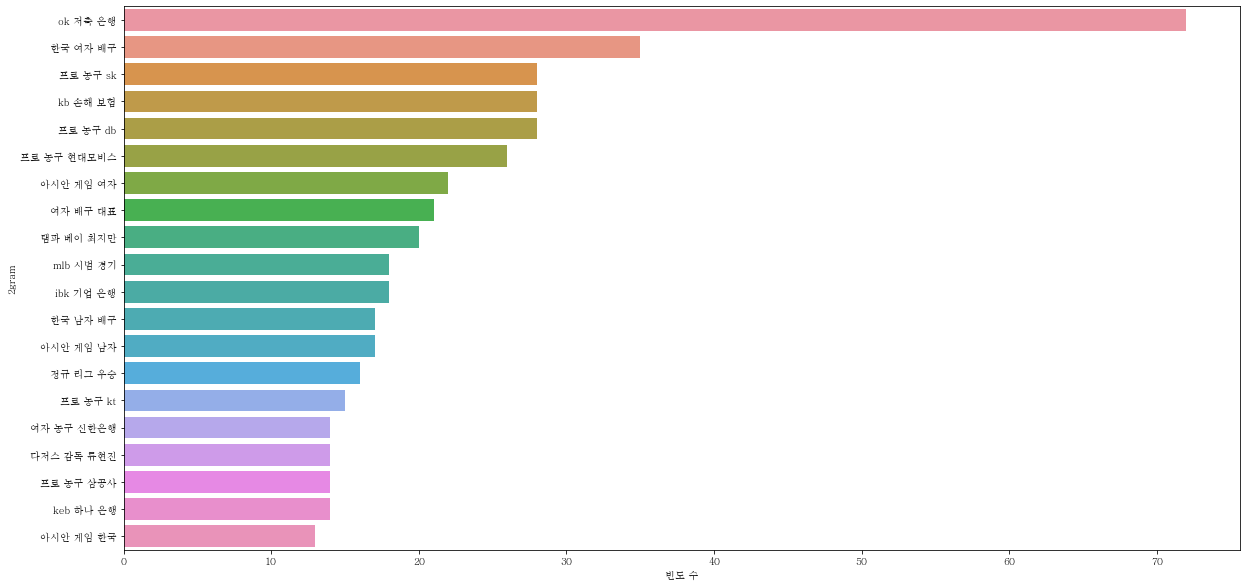

In [66]:
sports_top_trigram = get_top_ngram(sports_corpus, 3)[:20]
x, y = map(list, zip(*sports_top_trigram))

plt.rcParams['font.family'] = 'batang'
plt.figure(figsize=(20,10))
ax = sns.barplot(x=y, y=x)
ax.set(xlabel="빈도 수", ylabel="2gram")

In [67]:
sports_top_trigram

[('ok 저축 은행', 72),
 ('한국 여자 배구', 35),
 ('프로 농구 sk', 28),
 ('kb 손해 보험', 28),
 ('프로 농구 db', 28),
 ('프로 농구 현대모비스', 26),
 ('아시안 게임 여자', 22),
 ('여자 배구 대표', 21),
 ('탬파 베이 최지만', 20),
 ('mlb 시범 경기', 18),
 ('ibk 기업 은행', 18),
 ('한국 남자 배구', 17),
 ('아시안 게임 남자', 17),
 ('정규 리그 우승', 16),
 ('프로 농구 kt', 15),
 ('여자 농구 신한은행', 14),
 ('다저스 감독 류현진', 14),
 ('프로 농구 삼공사', 14),
 ('keb 하나 은행', 14),
 ('아시안 게임 한국', 13)]

### 정치

[Text(0.5, 0, '빈도 수'), Text(0, 0.5, '2gram')]

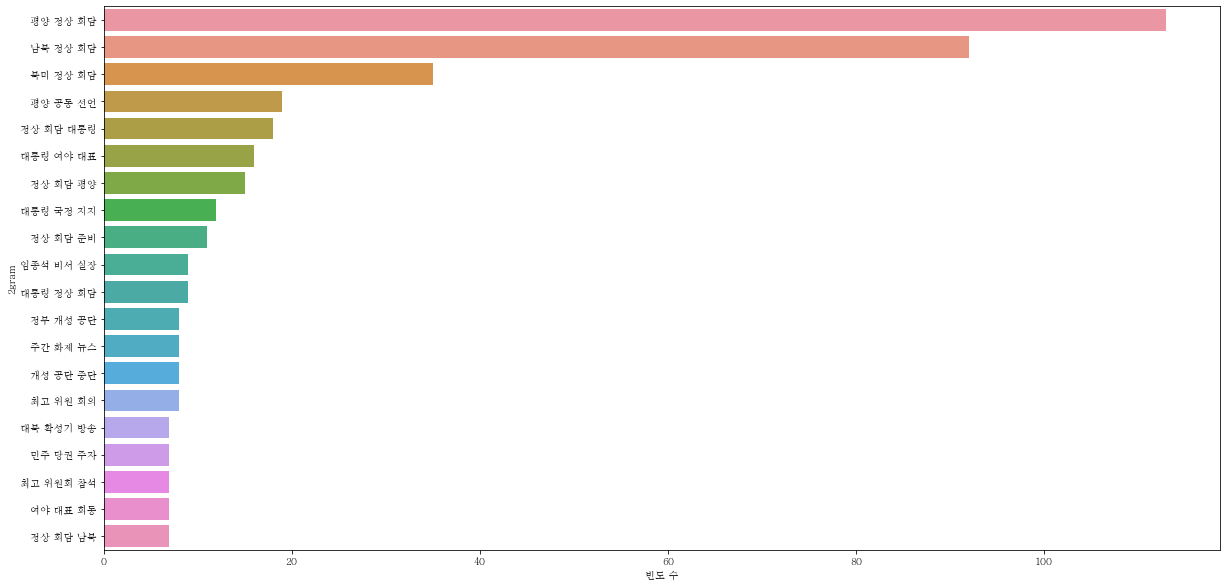

In [68]:
politic_top_trigram = get_top_ngram(politic_corpus, 3)[:20]
x, y = map(list, zip(*politic_top_trigram))

plt.rcParams['font.family'] = 'batang'
plt.figure(figsize=(20,10))
ax = sns.barplot(x=y, y=x)
ax.set(xlabel="빈도 수", ylabel="2gram")

In [69]:
politic_top_trigram

[('평양 정상 회담', 113),
 ('남북 정상 회담', 92),
 ('북미 정상 회담', 35),
 ('평양 공동 선언', 19),
 ('정상 회담 대통령', 18),
 ('대통령 여야 대표', 16),
 ('정상 회담 평양', 15),
 ('대통령 국정 지지', 12),
 ('정상 회담 준비', 11),
 ('임종석 비서 실장', 9),
 ('대통령 정상 회담', 9),
 ('정부 개성 공단', 8),
 ('주간 화제 뉴스', 8),
 ('개성 공단 중단', 8),
 ('최고 위원 회의', 8),
 ('대북 확성기 방송', 7),
 ('민주 당권 주자', 7),
 ('최고 위원회 참석', 7),
 ('여야 대표 회동', 7),
 ('정상 회담 남북', 7)]